# Connect to database

In [1]:
import qcodes.dataset.experiment_container as exc
from qcodes.dataset.plotting import plot_by_id, load_by_id, get_data_by_id 

In [2]:
import qcodes as qc
import numpy as np

In [3]:
qc.config.core.db_location = './experiments.db' # this selects the database

In [4]:
exc.experiments() # look whats in the database

[doNd-tutorial#no sample#1@./experiments.db
 ------------------------------------------
 1-results-1-dac_ch1,dmm_v1,dmm_v2-200
 2-results-2-dac_ch1,dmm_v1,dmm_v2-200
 3-results-3-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 4-results-4-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 5-results-5-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 6-results-6-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 7-results-7-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 8-results-8-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 9-results-9-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 10-results-10-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 11-results-11-dac_ch1,dac_ch2,dmm_v1,dmm_v2-20000
 12-results-12-dac_ch1,dmm_v1,dmm_v2-200,
 doNd-tutorial#no sample#2@./experiments.db
 ------------------------------------------,
 doNd-tutorial#no sample#3@./experiments.db
 ------------------------------------------,
 doNd-tutorial#no sample#4@./experiments.db
 ------------------------------------------
 13-results-1-dac_ch1,arrayinst_ChanA_this_setpoint,arrayinst_ChanA_dummy_array_p

# QtPlot with live plotting
* show a completed or running measurement by id in database

In [5]:
from qdev_wrappers.dataset.QtPlotbyID import QtPlotbyID

/Users/sschaal/anaconda3/envs/qcodes/lib/python3.6/site-packages/qdev_wrappers/logger.py:16: UserWarning: The logger.py of qdev-wrappers is deprecated and will be removed soon. Please use the logger of QCoDeS instead.
  warnings.warn('The logger.py of qdev-wrappers is deprecated and will be '


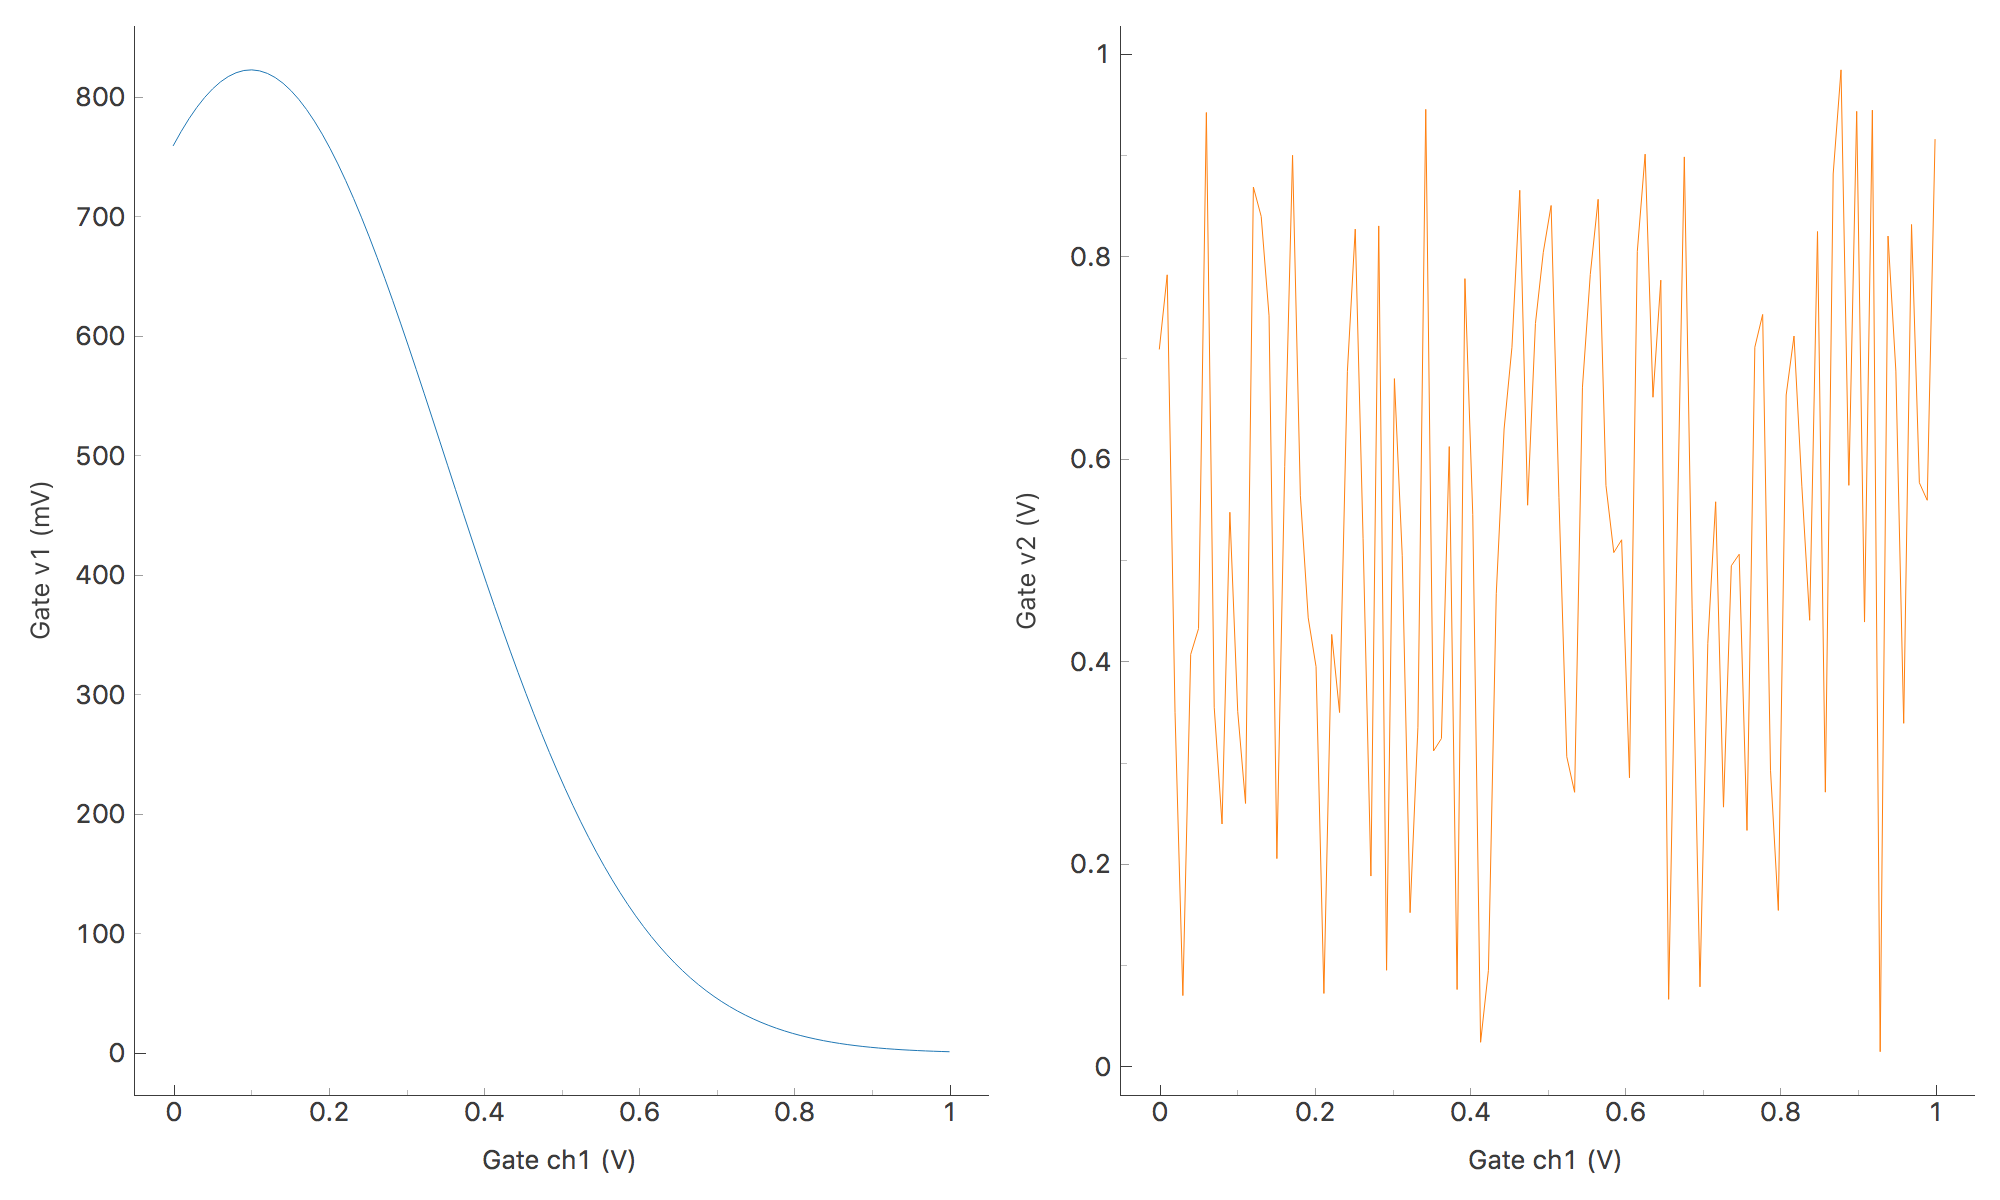

In [6]:
QtPlotbyID(id=2) # complteted

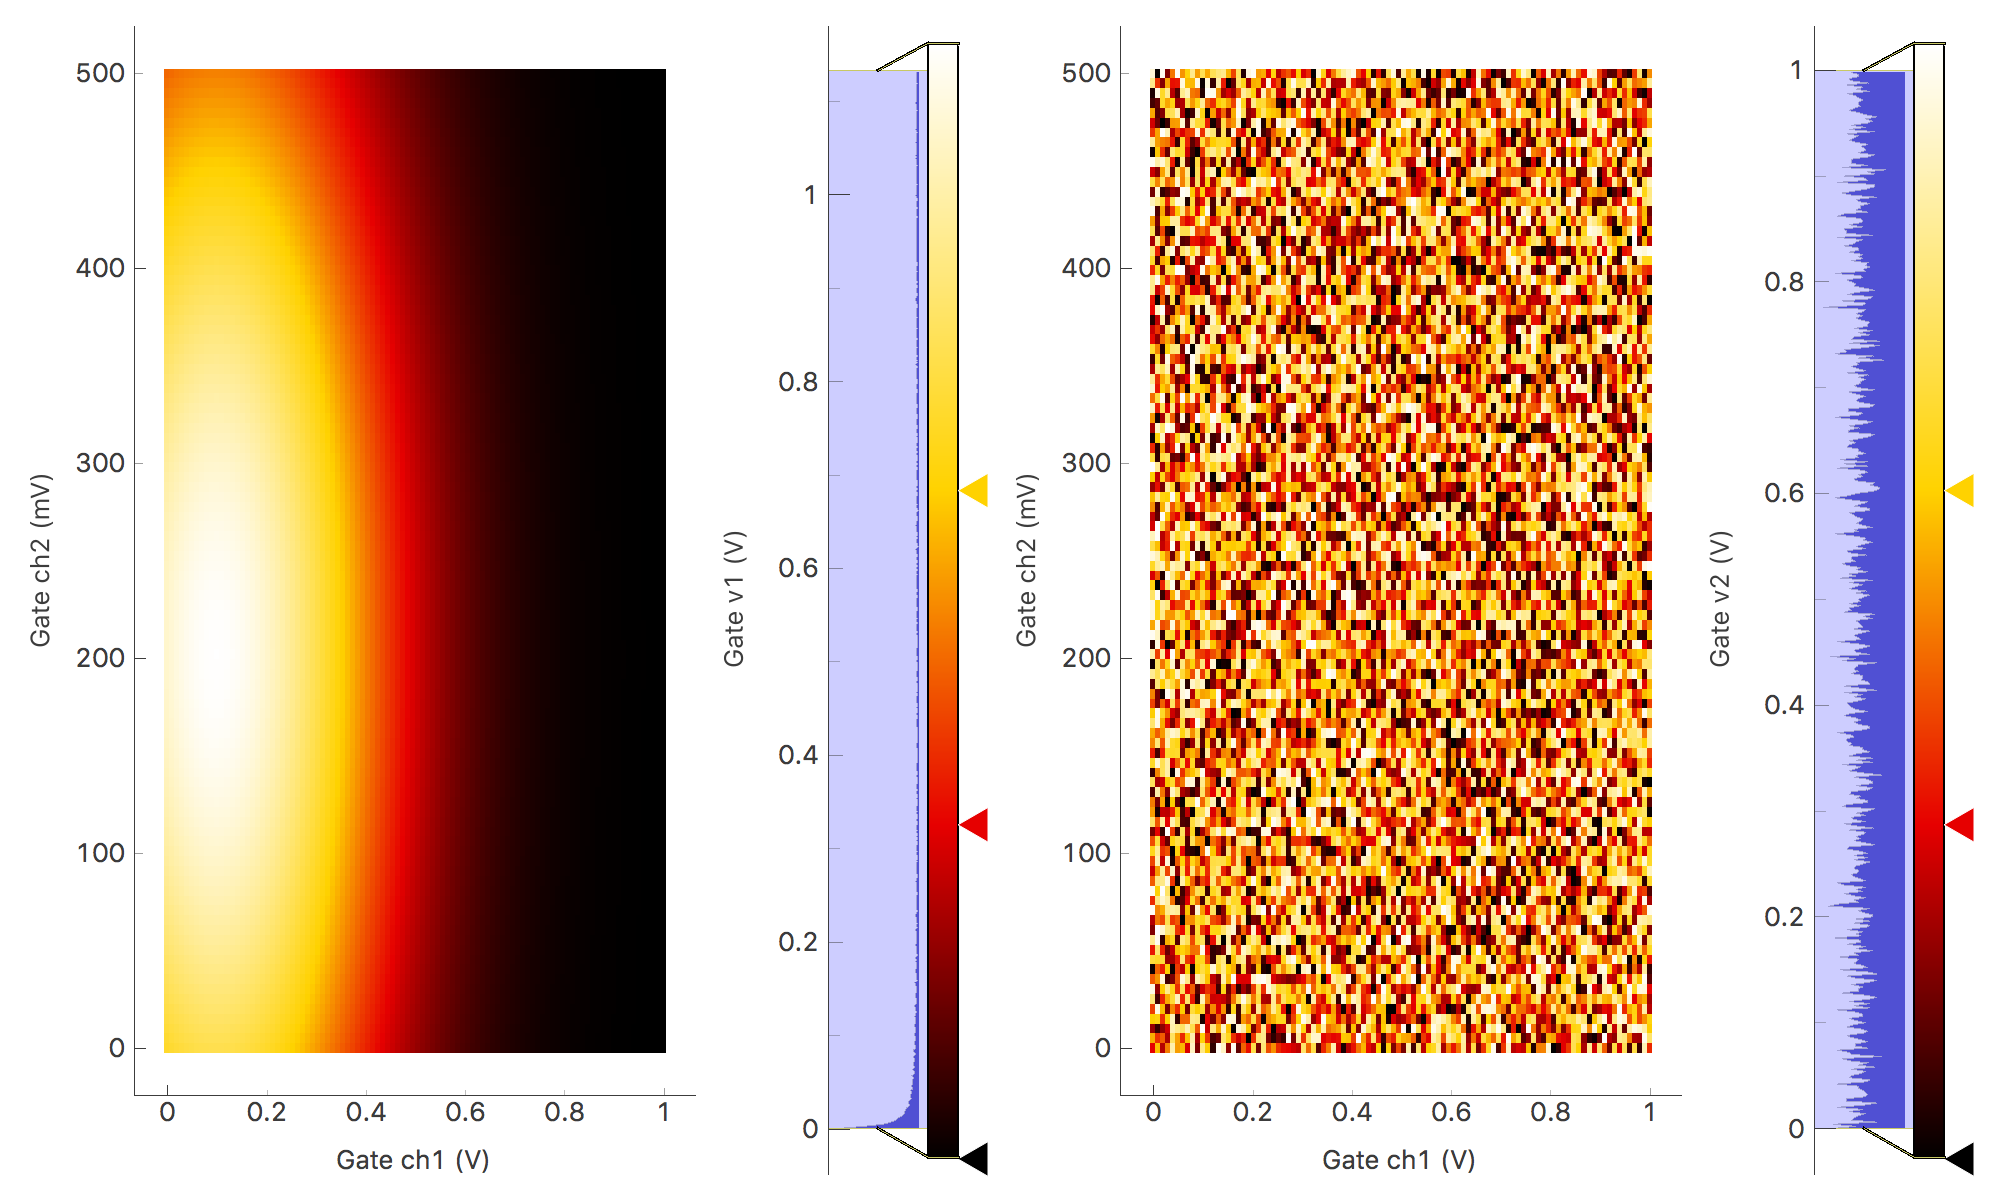

In [10]:
QtPlotbyID(id=11) #live

# Live plotting with plottr
* install plottr: https://github.com/data-plottr/plottr
* from plottr files copy plottr/inspectr.py to your data directory
* Run plottr in different console to get inspector and live plotting

In [ ]:

run inspectr.py --dbpath=./experiments.db


* or import the one which I copied into the qdev_wrappers

In [7]:
from qdev_wrappers.dataset.inspectr import main as inspectr

In [9]:
inspectr('./experiments.db', log=False)

# Processing data

## Get dataset from database by id

In [55]:
data=load_by_id(3)

([<matplotlib.axes._subplots.AxesSubplot at 0x10da1c9b0>,
  <matplotlib.colorbar.Colorbar at 0x10e324358>])

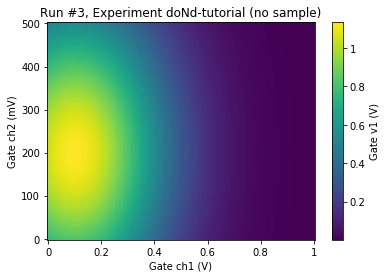

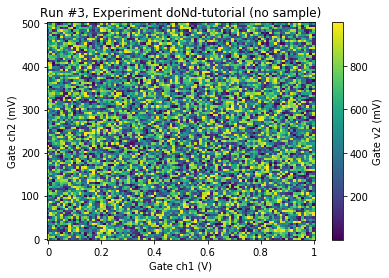

In [25]:
plot_by_id(3)

In [56]:
data

results #3@./experiments.db
---------------------------
dac_ch1 - numeric
dac_ch2 - numeric
dmm_v1 - numeric
dmm_v2 - numeric

In [34]:
data.snapshot # get the metadata saved with the measurement

{'station': {'instruments': {},
  'parameters': {},
  'components': {'StationConfigurator': {'instruments': {'lockin1': {'driver': 'qcodes.instrument_drivers.stanford_research.SR830',
      'type': 'SR830',
      'address': 'GPIB0::9::INSTR',
      'enable_forced_reconnect': True,
      'parameters': {'frequency': {'monitor': True},
       'amplitude': {'monitor': True, 'step': 0.004, 'inter_delay': 0.1},
       'aux_out1': {'monitor': True, 'step': 0.1, 'inter_delay': 0.1},
       'aux_out2': {'monitor': True, 'step': 0.1, 'inter_delay': 0.1},
       'aux_out3': {'monitor': True, 'step': 0.1, 'inter_delay': 0.1},
       'aux_out4': {'monitor': True, 'step': 0.1, 'inter_delay': 0.1}}},
     'lockin2': {'driver': 'qcodes.instrument_drivers.stanford_research.SR830',
      'type': 'SR830',
      'address': 'GPIB0::8::INSTR',
      'enable_forced_reconnect': True,
      'parameters': {'frequency': {'monitor': True},
       'amplitude': {'monitor': True, 'step': 0.004, 'inter_delay': 0.1},


In [28]:
data.get_parameters() # here you can see what parameters are in the database and how they depend on each other

[ParamSpec('dac_ch1', 'numeric', 'Gate ch1', 'V', inferred_from=[], depends_on=[]),
 ParamSpec('dac_ch2', 'numeric', 'Gate ch2', 'V', inferred_from=[], depends_on=[]),
 ParamSpec('dmm_v1', 'numeric', 'Gate v1', 'V', inferred_from=[], depends_on=['dac_ch1', 'dac_ch2']),
 ParamSpec('dmm_v2', 'numeric', 'Gate v2', 'V', inferred_from=[], depends_on=['dac_ch1', 'dac_ch2'])]

In [29]:
dac=np.array(data.get_data('dac_ch1')) # or get_values, just returns the array (not a numpy array)

In [61]:
dac.shape

(20000, 1)

In [31]:
dmm=np.array(data.get_data('dmm_v1')) # or get_values, just returns the array (not a numpy array)

In [33]:
dac.shape # 2d data is actually unfolded in single array

(20000, 1)

## Another way to get the arrays 

In [35]:
data=get_data_by_id(3) # return data as array of dict

In [36]:
data

[[{'name': 'dac_ch1',
   'label': 'Gate ch1',
   'unit': 'V',
   'data': array([ 0.,  0.,  0., ...,  1.,  1.,  1.])},
  {'name': 'dac_ch2',
   'label': 'Gate ch2',
   'unit': 'V',
   'data': array([ 0.        ,  0.00505051,  0.01010101, ...,  0.48989899,
           0.49494949,  0.5       ])},
  {'name': 'dmm_v1',
   'label': 'Gate v1',
   'unit': 'V',
   'data': array([ 0.75957212,  0.77179026,  0.78388495, ...,  0.0008873 ,
           0.00086658,  0.00084599])}],
 [{'name': 'dac_ch1',
   'label': 'Gate ch1',
   'unit': 'V',
   'data': array([ 0.,  0.,  0., ...,  1.,  1.,  1.])},
  {'name': 'dac_ch2',
   'label': 'Gate ch2',
   'unit': 'V',
   'data': array([ 0.        ,  0.00505051,  0.01010101, ...,  0.48989899,
           0.49494949,  0.5       ])},
  {'name': 'dmm_v2',
   'label': 'Gate v2',
   'unit': 'V',
   'data': array([ 0.87891221,  0.84322243,  0.91035729, ...,  0.93492746,
           0.07091477,  0.51700366])}]]

In [40]:
len(data) # there is two measuremnts in here, dmm_v1 and dmm_v2

2

In [42]:
data[0][0] # xdata

{'name': 'dac_ch1',
 'label': 'Gate ch1',
 'unit': 'V',
 'data': array([ 0.,  0.,  0., ...,  1.,  1.,  1.])}

In [52]:
data[0][0]['data'].shape # data is always repeated

(10000,)

In [43]:
data[0][1] # ydata

{'name': 'dac_ch2',
 'label': 'Gate ch2',
 'unit': 'V',
 'data': array([ 0.        ,  0.00505051,  0.01010101, ...,  0.48989899,
         0.49494949,  0.5       ])}

In [53]:
data[0][1]['data'].shape # data is always repeated

(10000,)

In [44]:
data[0][2] # zdata

{'name': 'dmm_v1',
 'label': 'Gate v1',
 'unit': 'V',
 'data': array([ 0.75957212,  0.77179026,  0.78388495, ...,  0.0008873 ,
         0.00086658,  0.00084599])}

In [46]:
data[0][2]['data'].shape # already a numpy array but still unfolded

(10000,)

## Unfold 2d data to plot

In [47]:
from qcodes.dataset.data_export import reshape_2D_data

In [48]:
xrow, yrow, z_to_plot = reshape_2D_data(data[0][0]['data'],data[0][1]['data'],data[0][2]['data'])

In [50]:
z_to_plot.shape # correct shape now

(100, 100)

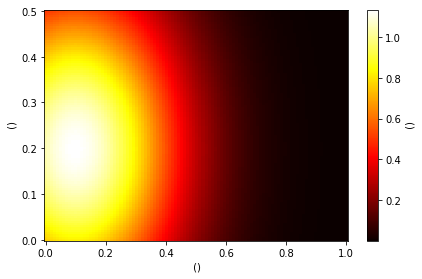

In [54]:
plot=qc.MatPlot()
plot.add(xrow, yrow, z_to_plot)

## Pandas
* data can be return as pandas dataframe which is very useful
* pandas basically saves data like a spreadsheet (coloums & index rows) and is using numpy arrays under the hood
* it has many functions to quickly get some statistics from the data and to do quick plots

In [65]:
import pandas as pd

In [93]:
data=load_by_id(2)

In [94]:
df = data.get_data_as_pandas_dataframe()['dmm_v1']

In [69]:
df.head()

,dmm_v1
dac_ch1,
0.000000,0.759572
0.010101,0.771318
0.020202,0.781968
0.030303,0.791472
0.040404,0.799784


In [124]:
df.describe() # statistics

,dmm_v1
count,10000.000000
mean,0.391883
std,0.378880
min,0.000846
25%,0.031143
50%,0.259020
75%,0.734183
max,1.133102


In [125]:
df['dmm_v1'].mean()

0.39188263290795106

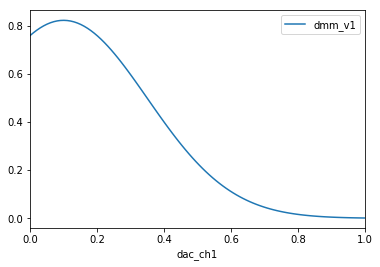

In [70]:
df.plot()

In [87]:
df.to_csv('save_test.txt') # easy to save data to text and much more

In [97]:
df.shape

(100, 1)

In [114]:
data=load_by_id(3)

In [115]:
df = data.get_data_as_pandas_dataframe()['dmm_v1']

In [116]:
df.head()

dmm_v1
dac_ch1 dac_ch2           
0.0     0.000000  0.759572
        0.005051  0.771790
        0.010101  0.783885
        0.015152  0.795844
        0.020202  0.807656

In [92]:
df.shape # data here is also unfolded

(10000, 1)

In [ ]:
# how is the data structured

In [102]:
df.columns # measured parameters are coloumns

Index(['dmm_v1'], dtype='object')

In [120]:
df.index.names # setpoints are indices

FrozenList(['dac_ch1', 'dac_ch2'])

In [121]:
df.reset_index().head() # if we want to access index data easily we can do reset_index

,dac_ch1,dac_ch2,dmm_v1
0,0.0,0.000000,0.759572
1,0.0,0.005051,0.771790
2,0.0,0.010101,0.783885
3,0.0,0.015152,0.795844
4,0.0,0.020202,0.807656


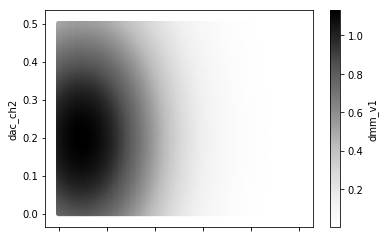

In [122]:
df.reset_index().plot.scatter('dac_ch1', 'dac_ch2', c='dmm_v1') # then we can do a quick plot using pandas without reshaping anything

In [127]:
# or do reshaping

In [128]:
dfr=df.reset_index()

In [129]:
xrow, yrow, z_to_plot = reshape_2D_data(dfr.dac_ch1, dfr.dac_ch2, dfr.dmm_v1)

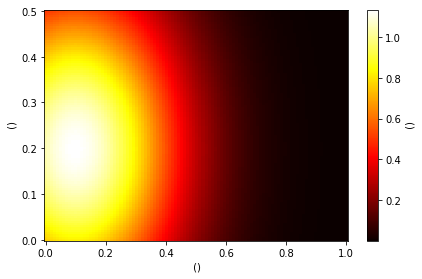

In [130]:
plot=qc.MatPlot()
plot.add(xrow, yrow, z_to_plot)

In [ ]:
# array parameter

In [131]:
data=load_by_id(14)

In [132]:
data

results #14@./experiments.db
----------------------------
dac_ch1 - numeric
arrayinst_ChanA_this_setpoint - numeric
arrayinst_ChanA_dummy_array_parameter - numeric

In [133]:
data.get_parameters()

[ParamSpec('dac_ch1', 'numeric', 'Gate ch1', 'V', inferred_from=[], depends_on=[]),
 ParamSpec('arrayinst_ChanA_this_setpoint', 'numeric', 'this setpoint', 'this setpointunit', inferred_from=[], depends_on=[]),
 ParamSpec('arrayinst_ChanA_dummy_array_parameter', 'numeric', 'this label', 'this unit', inferred_from=[], depends_on=['dac_ch1', 'arrayinst_ChanA_this_setpoint'])]

In [139]:
df=data.get_data_as_pandas_dataframe()['arrayinst_ChanA_dummy_array_parameter']

In [143]:
df.head()

arrayinst_ChanA_dummy_array_parameter
dac_ch1 arrayinst_ChanA_this_setpoint                                       
0.0     5                                                           0.052942
        6                                                           0.317511
        7                                                           0.520334
        8                                                           0.748156
        9                                                           0.256428